# Setup

In [1]:
# imports
from IPython.display import display, HTML
from pathlib import Path

import gzip

# graphing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import shutil

%matplotlib inline

In [2]:
# generate synthetic data for performance testsing
!python -m synthetic_data

Test data exists in multiple formats.


In [3]:
# data paths
data_path = Path("data")

# list paths for data here for convenience
data_csv = Path("data", "python_dev_universe.csv")
data_csv_gz = Path(data_path, "python_dev_universe.csv.gz")
data_parquet = Path("data", "python_dev_universe.parquet")

# test pandas/polars read CSV and compressed CSV

In [4]:
data_csv_gz = Path("data", "python_dev_universe.csv.gz")
df_pandas = pd.read_csv(data_csv_gz, compression="gzip")

In [5]:
df_pandas.head(2)

,customer_id,age,their_lucky_number,occupation,psf_membership_status,education,date_started_python
0,A43321819,47,0,Data Engineer,Contributing,High School,1924-07-20
1,001338908,37,0,Rustacean,Managing,High School,2004-03-09


In [6]:
df_polars = pl.read_csv(source=data_csv_gz)

In [7]:
df_polars.head(2)

customer_id,age,their_lucky_number,occupation,psf_membership_status,education,date_started_python
str,i64,i64,str,str,str,str
"""A43321819""",47,0,"""Data Engineer""","""Contributing""","""High School""","""1924-07-20"""
"""001338908""",37,0,"""Rustacean""","""Managing""","""High School""","""2004-03-09"""


# Write functions to test elapsed time for multiple configurations - done manually to illustrate different combinations of parameters

## Pandas functions - more kwarg options

In [8]:
from log_timer_results import log_to_csv


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_default(datafile=data_csv):
    df = pd.read_csv(datafile)
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_gz(datafile=data_csv):
    df = pd.read_csv(data_csv_gz, compression="gzip")  # NOTE: gzipped file here
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_c(datafile=data_csv):
    df = pd.read_csv(datafile, engine="c")
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_python(datafile=data_csv):
    df = pd.read_csv(datafile, engine="python")
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_default_dtype_numpy(datafile=data_csv):
    df = pd.read_csv(datafile, dtype_backend="numpy_nullable")
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine__c_dtype_numpy(datafile=data_csv):
    df = pd.read_csv(datafile, engine="c", dtype_backend="numpy_nullable")
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_python__dtype_numpy(datafile=data_csv):
    df = pd.read_csv(datafile, engine="python", dtype_backend="numpy_nullable")
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_pyarrow(datafile=data_csv):
    df = pd.read_csv(datafile, engine="pyarrow")
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_pyarrow_dtype_numpy(datafile=data_csv):
    df = pd.read_csv(datafile, engine="pyarrow", dtype_backend="numpy_nullable")
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_csv_engine_pyarrow_dtype_pyarrow(datafile=data_csv):
    df = pd.read_csv(datafile, engine="pyarrow", dtype_backend="pyarrow")
    print(df.head(1))
    return True


@log_to_csv(log_filename="time_parquet_results.csv", buffer_size=10, flush_on_return=True)
def pandas_read_parquet(datafile=data_parquet):
    df = pd.read_parquet(datafile)
    print(df.head(1))
    return True

## Polars options

In [11]:
@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def polars_read_csv(datafile=data_csv):
    df = pl.read_csv(source=datafile)
    print(df.head(1))
    return True

@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def polars_read_csv_singlethread(datafile=data_csv):
    df = pl.read_csv(source=datafile, n_threads=1)
    print(df.head(1))
    return True
    
@log_to_csv(log_filename="time_csv_results.csv", buffer_size=10, flush_on_return=True)
def polars_read_csv_gz(datafile=data_csv_gz):
    df = pl.read_csv(data_csv_gz)  # NOTE: gzipped file here
    print(df.head(1))
    return True

@log_to_csv(log_filename="time_parquet_results.csv", buffer_size=10, flush_on_return=True)
def polars_read_parquet(datafile=data_parquet):
    df = pl.read_parquet(source=datafile)
    print(df.head(1))
    return True

# Quick result - run each read function once

In [10]:
# read csv with a variety of configs
pandas_read_csv_default()
pandas_read_csv_engine_c()
pandas_read_csv_engine_python()
pandas_read_csv_default_dtype_numpy()
pandas_read_csv_engine__c_dtype_numpy()
pandas_read_csv_engine_python__dtype_numpy()
pandas_read_csv_engine_pyarrow()
pandas_read_csv_engine_pyarrow_dtype_numpy()
pandas_read_csv_engine_pyarrow_dtype_pyarrow()

# polars
polars_read_csv_singlethread()
polars_read_csv()

# reading compressed files
pandas_read_csv_gz()
polars_read_csv_gz()

# read parquet tiles
pandas_read_parquet()
polars_read_parquet()

  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_default
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_engine_c
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_engine_python
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education 

NameError: name 'polars_read_parquet' is not defined

In [13]:
df_csv_results = pd.read_csv(
    "time_csv_results.csv", header=0, engine="pyarrow", dtype_backend="pyarrow"
)
df_csv_results

,function_name,elapsed_time,iteration
0,pandas_read_csv_default,50.754199,0
1,pandas_read_csv_engine_c,50.454714,0
2,pandas_read_csv_engine_python,256.138989,0
3,pandas_read_csv_default_dtype_numpy,60.678965,0
4,pandas_read_csv_engine__c_dtype_numpy,53.267463,0
5,pandas_read_csv_engine_python__dtype_numpy,239.646672,0
6,pandas_read_csv_engine_pyarrow,22.002287,0
7,pandas_read_csv_engine_pyarrow_dtype_numpy,24.820781,0
8,pandas_read_csv_engine_pyarrow_dtype_pyarrow,4.607117,0
9,polars_read_csv_singlethread,8.385164,0


<Axes: xlabel='function_name'>

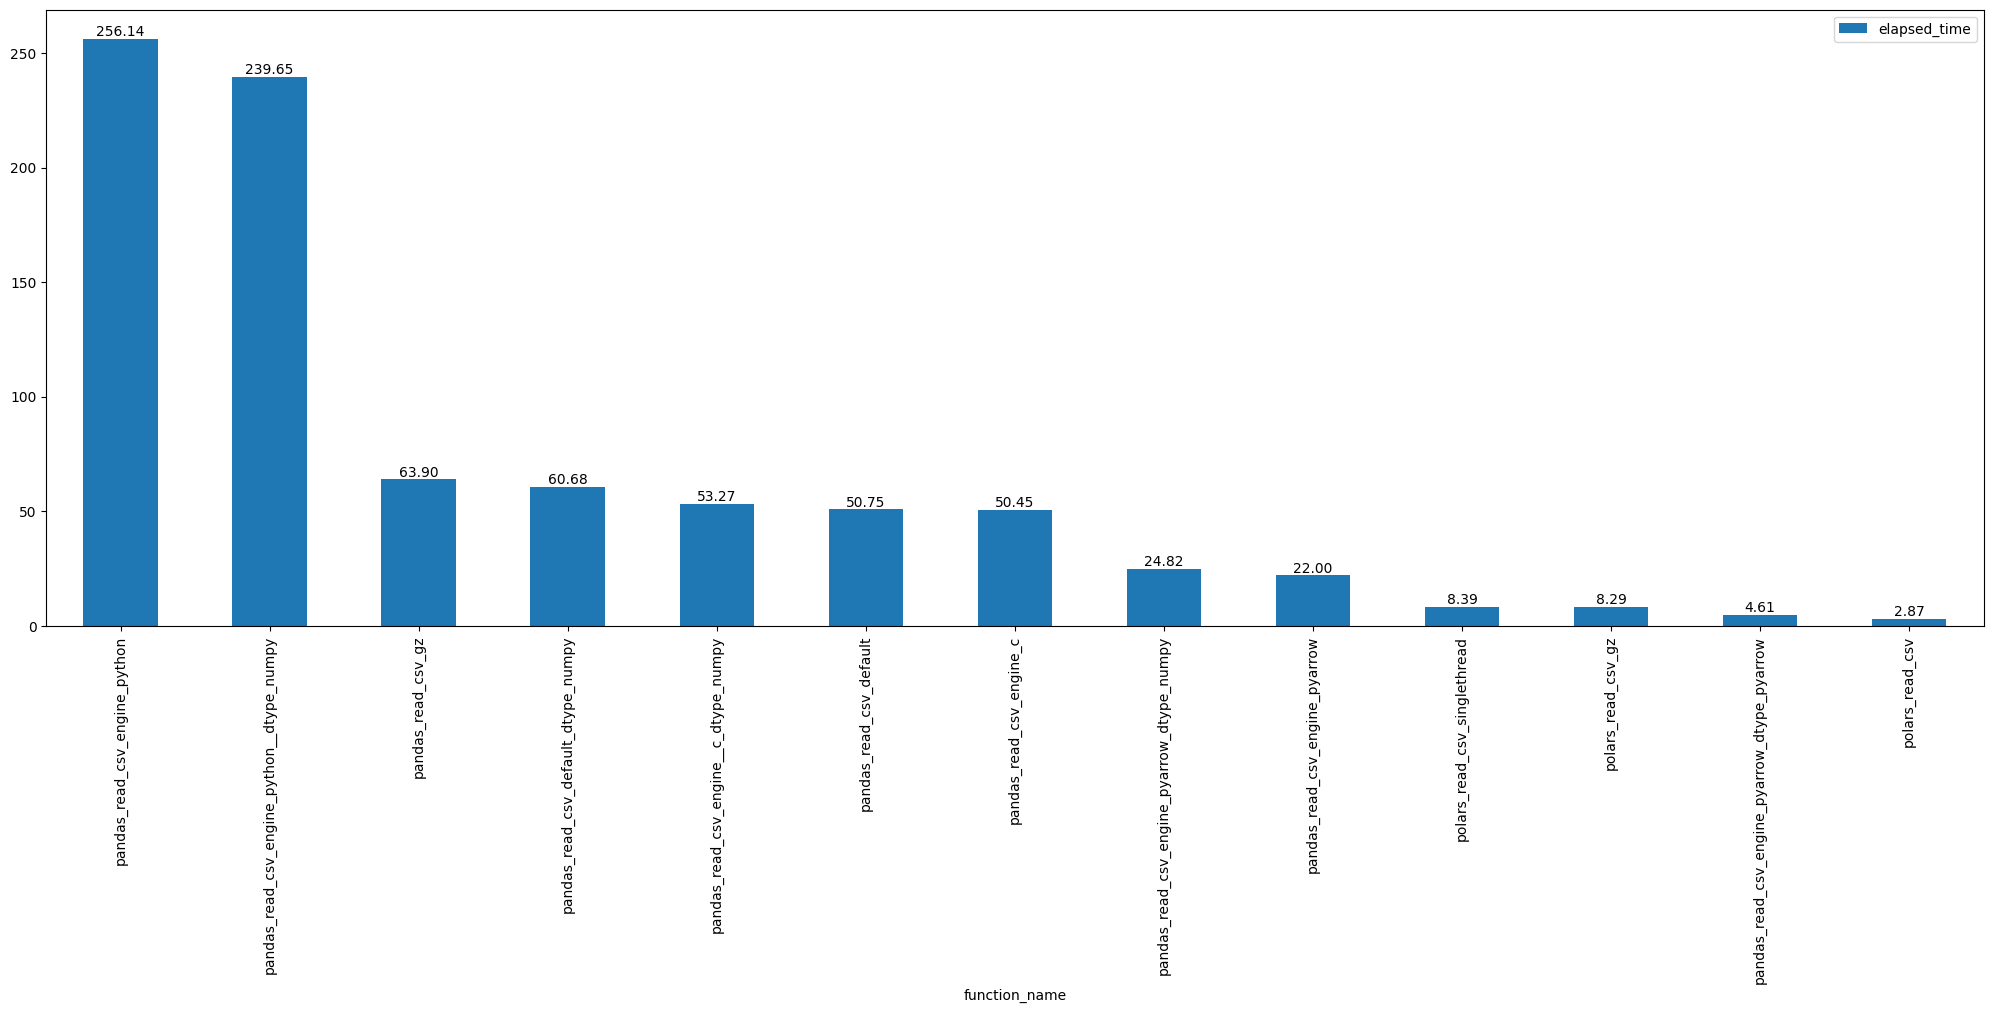

In [16]:
# graph results - csv
ax_csv = df_csv_results.sort_values(["elapsed_time", "function_name"], ascending=[False, True]).plot(
    kind="bar", x="function_name", y="elapsed_time", figsize=(25, 8)
);
ax_csv.bar_label(ax_csv.containers[0], fmt='%.2f')
ax_csv

In [17]:
pd.options.future.infer_string = True

In [18]:
# re-run csv tests
# read csv with a variety of configs
pandas_read_csv_default()
pandas_read_csv_engine_c()
pandas_read_csv_engine_python()
pandas_read_csv_default_dtype_numpy()
pandas_read_csv_engine__c_dtype_numpy()
pandas_read_csv_engine_python__dtype_numpy()
pandas_read_csv_engine_pyarrow()
pandas_read_csv_engine_pyarrow_dtype_numpy()
pandas_read_csv_engine_pyarrow_dtype_pyarrow()

# reading compressed files
pandas_read_csv_gz()

  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_default
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_engine_c
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education date_started_python  
0  High School          1924-07-20  
saving results: pandas_read_csv_engine_python
  customer_id  age  their_lucky_number     occupation psf_membership_status  \
0   A43321819   47                   0  Data Engineer          Contributing   

     education 

True

In [19]:
# re-read datafile and repeat plot
df_csv_results_v2 = pd.read_csv(
    "time_csv_results.csv", header=0, engine="pyarrow", dtype_backend="pyarrow"
)
df_csv_results_v2


,function_name,elapsed_time,iteration
0,pandas_read_csv_default,50.754199,0
1,pandas_read_csv_engine_c,50.454714,0
2,pandas_read_csv_engine_python,256.138989,0
3,pandas_read_csv_default_dtype_numpy,60.678965,0
4,pandas_read_csv_engine__c_dtype_numpy,53.267463,0
5,pandas_read_csv_engine_python__dtype_numpy,239.646672,0
6,pandas_read_csv_engine_pyarrow,22.002287,0
7,pandas_read_csv_engine_pyarrow_dtype_numpy,24.820781,0
8,pandas_read_csv_engine_pyarrow_dtype_pyarrow,4.607117,0
9,polars_read_csv_singlethread,8.385164,0


<Axes: xlabel='function_name'>

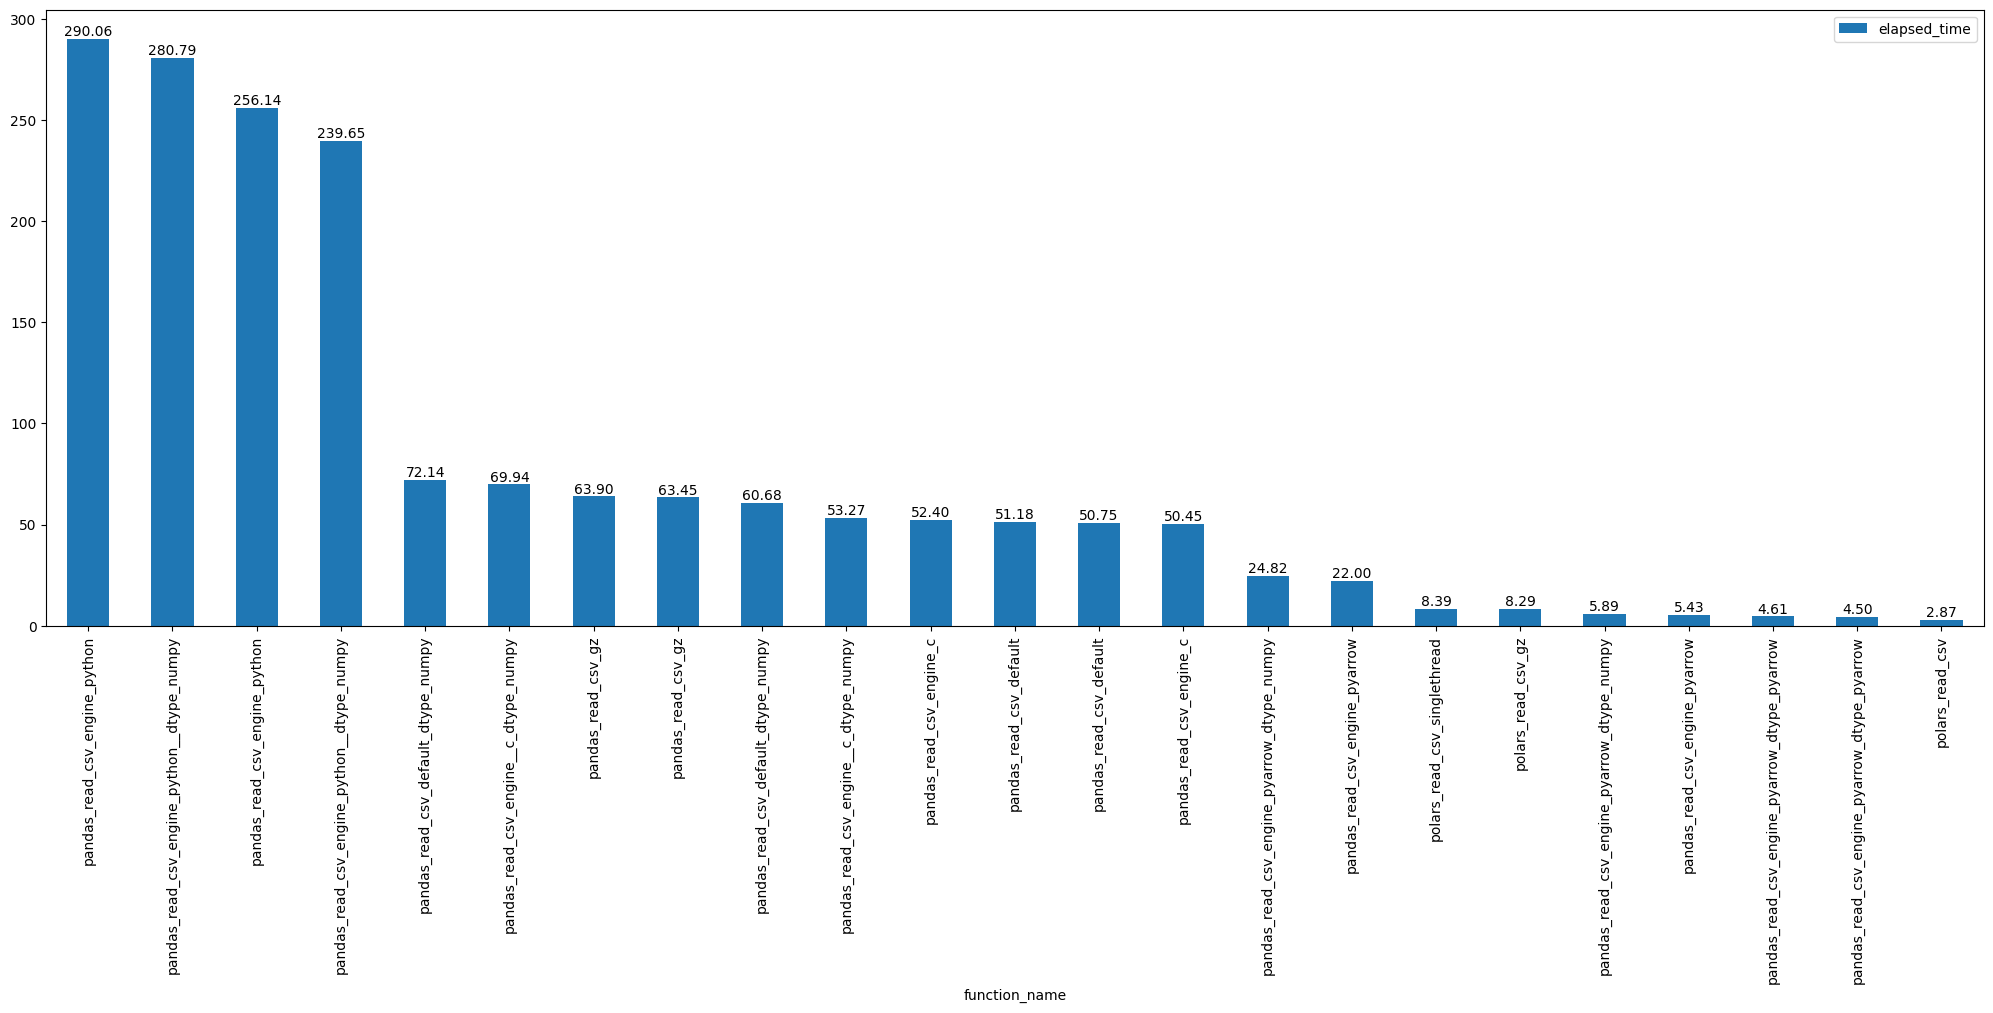

In [21]:
ax_csv_v2 = df_csv_results_v2.sort_values(["elapsed_time", "function_name"], ascending=[False, True]).plot(
    kind="bar", x="function_name", y="elapsed_time", figsize=(25, 8)
);
ax_csv_v2.bar_label(ax_csv_v2.containers[0], fmt='%.2f')
ax_csv_v2

# Read Parquet files

In [22]:
df_parquet_results = pd.read_csv(
    "time_parquet_results.csv", header=0, engine="pyarrow", dtype_backend="pyarrow"
)
df_parquet_results

,function_name,elapsed_time,iteration
0,pandas_read_parquet,21.648859,0
1,polars_read_parquet,2.156311,0


<Axes: xlabel='function_name'>

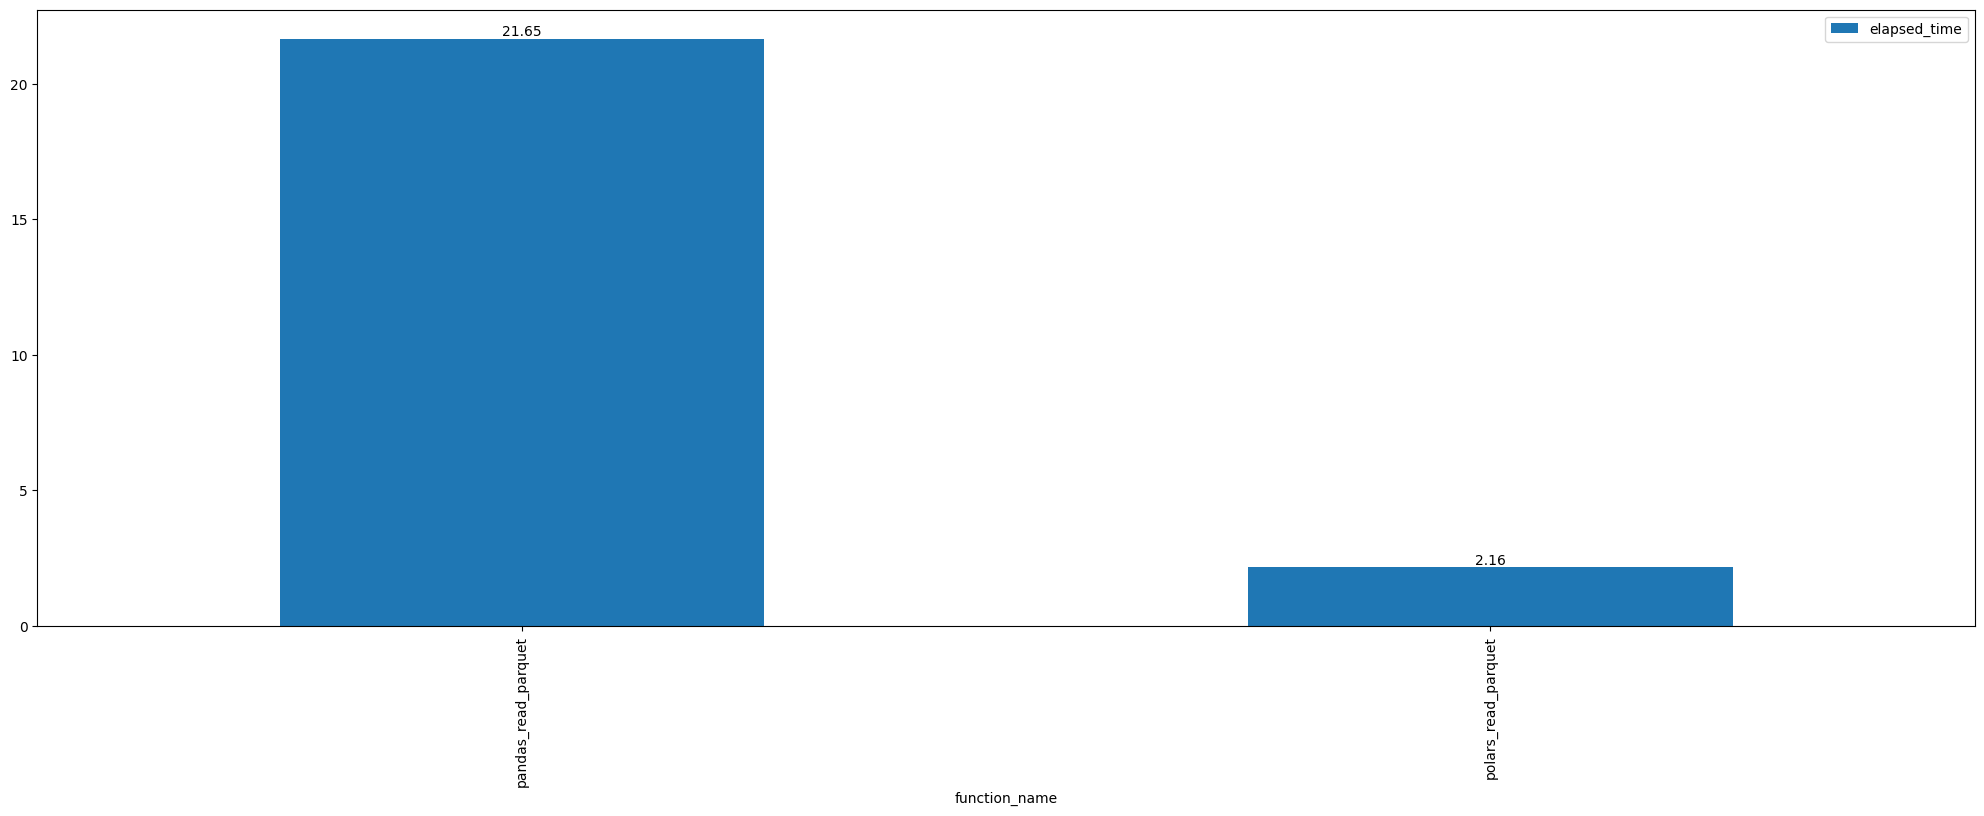

In [24]:
# graph results - csv
ax_parquet = df_parquet_results.sort_values(["elapsed_time", "function_name"], ascending=[False, True]).plot(
    kind="bar", x="function_name", y="elapsed_time", figsize=(25, 8)
);
ax_parquet.bar_label(ax_parquet.containers[0], fmt='%.2f')
ax_parquet

# slower, but more complete result 
## run each function multiple times, then average the result in a dataframe and graph it

## note - cells below set as `raw` in jupyter to avoid long runtimes; change to `code` and run the notebook again

# Look at Groupby performance

In [30]:
# df_data = pl.read_parquet(source=data_parquet).to_pandas()  # loses dtypes
df_data = pd.read_parquet(data_parquet, engine="pyarrow", dtype_backend="pyarrow")
df_data.head(2)

,customer_id,age,their_lucky_number,occupation,psf_membership_status,education,date_started_python
0,A43321819,47,0,Data Engineer,Contributing,High School,1924-07-20 00:00:00
1,001338908,37,0,Rustacean,Managing,High School,2004-03-09 00:00:00


In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000000 entries, 0 to 49999999
Data columns (total 7 columns):
 #   Column                 Dtype                 
---  ------                 -----                 
 0   customer_id            string[pyarrow]       
 1   age                    int64[pyarrow]        
 2   their_lucky_number     int64[pyarrow]        
 3   occupation             string[pyarrow]       
 4   psf_membership_status  string[pyarrow]       
 5   education              string[pyarrow]       
 6   date_started_python    timestamp[ns][pyarrow]
dtypes: int64[pyarrow](2), string[pyarrow](4), timestamp[ns][pyarrow](1)
memory usage: 3.9 GB


In [32]:
df_pd_grouped = df_data.groupby(["psf_membership_status", "occupation"], sort=True)[
    "customer_id"
].nunique()
df_pd_grouped

psf_membership_status  occupation             
Contributing           Apache Arrow Understudy    1111796
                       Data Engineer              1109760
                       Data Scientist             1110921
                       DevOps Savior              1110223
                       Machine Learning Eng       1109665
                       Pandas Guru                1109656
                       Polars Guru                1111091
                       Python Dev                 1111130
                       Rustacean                  1110305
Fellow                 Apache Arrow Understudy    1110755
                       Data Engineer              1111217
                       Data Scientist             1111422
                       DevOps Savior              1111875
                       Machine Learning Eng       1111758
                       Pandas Guru                1111270
                       Polars Guru                1111762
                       Py

In [34]:
df_pl = pl.from_pandas(df_data)
df_pl.describe

<bound method DataFrame.describe of shape: (50_000_000, 7)
┌─────────────┬─────┬───────────────┬───────────────┬───────────────┬───────────────┬──────────────┐
│ customer_id ┆ age ┆ their_lucky_n ┆ occupation    ┆ psf_membershi ┆ education     ┆ date_started │
│ ---         ┆ --- ┆ umber         ┆ ---           ┆ p_status      ┆ ---           ┆ _python      │
│ str         ┆ i64 ┆ ---           ┆ str           ┆ ---           ┆ str           ┆ ---          │
│             ┆     ┆ i64           ┆               ┆ str           ┆               ┆ datetime[ns] │
╞═════════════╪═════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪══════════════╡
│ A43321819   ┆ 47  ┆ 0             ┆ Data Engineer ┆ Contributing  ┆ High School   ┆ 1924-07-20   │
│             ┆     ┆               ┆               ┆               ┆               ┆ 00:00:00     │
│ 001338908   ┆ 37  ┆ 0             ┆ Rustacean     ┆ Managing      ┆ High School   ┆ 2004-03-09   │
│             ┆     ┆           

In [35]:
df_pl_grouped = grouped_pl_df = (
    df_pl.group_by(["psf_membership_status", "occupation"])
    .agg(pl.col("customer_id").n_unique().alias("unique_customer_count"))
    .sort(["psf_membership_status", "occupation"])
)
df_pl_grouped

psf_membership_status,occupation,unique_customer_count
str,str,u32
"""Contributing""","""Apache Arrow U…",1111796
"""Contributing""","""Data Engineer""",1109760
"""Contributing""","""Data Scientist…",1110921
"""Contributing""","""DevOps Savior""",1110223
"""Contributing""","""Machine Learni…",1109665
"""Contributing""","""Pandas Guru""",1109656
"""Contributing""","""Polars Guru""",1111091
"""Contributing""","""Python Dev""",1111130
"""Contributing""","""Rustacean""",1110305
